In [1]:
# from pytesis.intervals import *
# from pytesis.power import *
# from pytesis.utils import kde_grid
# from pytesis.datasets import (
#     arc,
#     eyeglasses,
#     filled_circle,
#     add_noise,
#     add_outliers,
#     football_sensor,
#     rectangle
# )
# from pytesis.datasets import plot_dataset
# from pytesis.fermat import fermat_dist
# from sklearn.metrics import pairwise_distances
# from functools import partial
# import numpy as np
# import pandas as pd

# from functools import partial

# import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

from pytesis.datasets import (
    arc,
    eyeglasses,
    filled_circle,
    add_noise,
    add_outliers,
    football_sensor,
    rectangle
)
from pytesis.results import run_all_intervals, run_all
from pytesis.utils import compose

from functools import partial

# Circulo

In [20]:
n = 500
sd = 0.075
iqr_factor = 0.2
outliers_frac = 0.05
B = 30

## Base

In [22]:
circle_factory = partial(arc, n=n)
circle_results = run_all(circle_factory, h=0.3, B_power=B)
circle_results.powers

Starting computing intervals
Intervals found in cache:  False
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,1.0
Fermat,1,30,1.0
KDE,1,30,1.0


## Ruido

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,1.0
Fermat,1,30,1.0
KDE,1,30,1.0


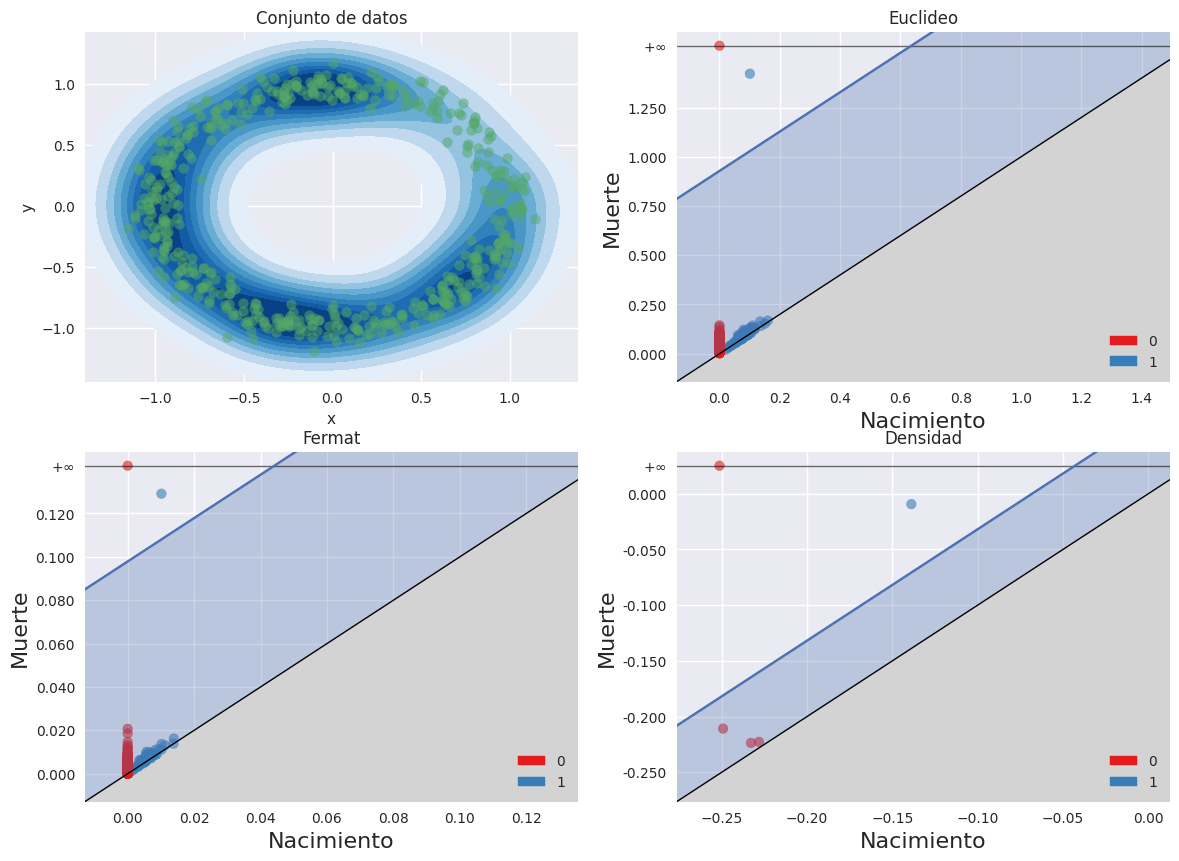

In [24]:
circle_noise_factory = compose(partial(add_noise, sd=sd), partial(arc, n=n))
circle_noise_results = run_all(circle_noise_factory, h=0.3, B_power=B)
circle_noise_results.powers

In [25]:
# circle_noise_factory_bis = compose(partial(add_noise, sd=sd/1.05), partial(arc, n=n))
# foo = run_all_intervals(circle_noise_factory_bis())

## Outliers

In [12]:
circle_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    partial(arc, n=n)
)
circle_outliers_results = run_all(circle_outliers_factory, h=0.3, B_power=B)
circle_outliers_results.powers

Starting computing intervals
Intervals found in cache:  False
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                    25       0.833333
         1                     5       0.166667
Fermat   0                    30       1.000000
         1                     0       0.000000
KDE      0                     0       0.000000
         1                    30       1.000000

Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


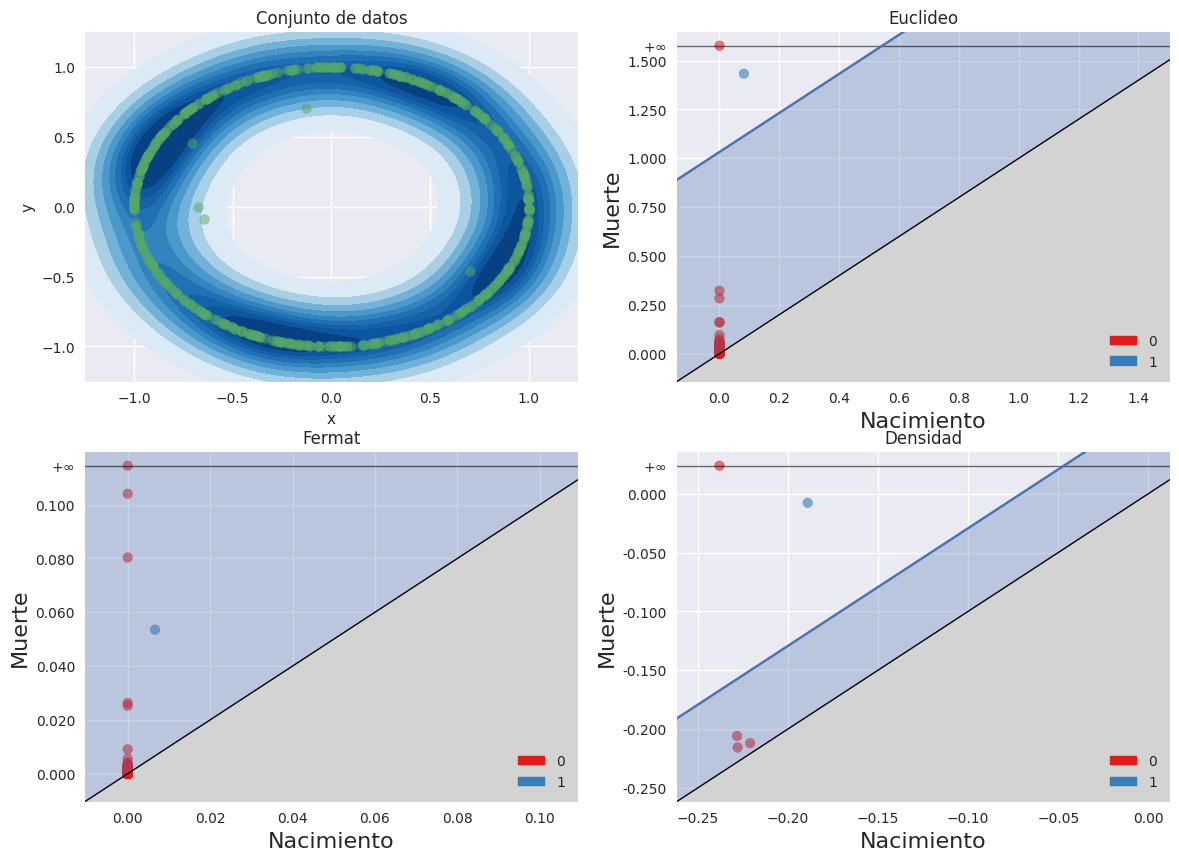

In [14]:
# circle_outliers_factory_bis = compose(
#     partial(add_outliers, frac=outliers_frac/5, iqr_factor=iqr_factor),
#     partial(arc, n=n)
# )
# foo = run_all_intervals(circle_outliers_factory_bis())

# Circulo Gaussiano

In [27]:
n = 500
sd = 0.075
iqr_factor = 0.2
outliers_frac = 0.05
B = 30

## Base

In [28]:
circle_gauss_factory = partial(arc, n=n, sampling="normal")
circle_gauss_results = run_all(circle_gauss_factory, h=0.3, B_power=B)
circle_gauss_results.powers

Starting computing intervals
Intervals found in cache:  False
Starting power analysis
Euclid in cache:  True
Fermat in cache:  True
KDE in cache:  True


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,1.0
Fermat,1,30,1.0
KDE,1,30,1.0


## Ruido

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


,,# Detecciones,% Detecciones
,Agujeros,,
Euclídeo,1,30,1.0
Fermat,1,30,1.0
KDE,1,30,1.0


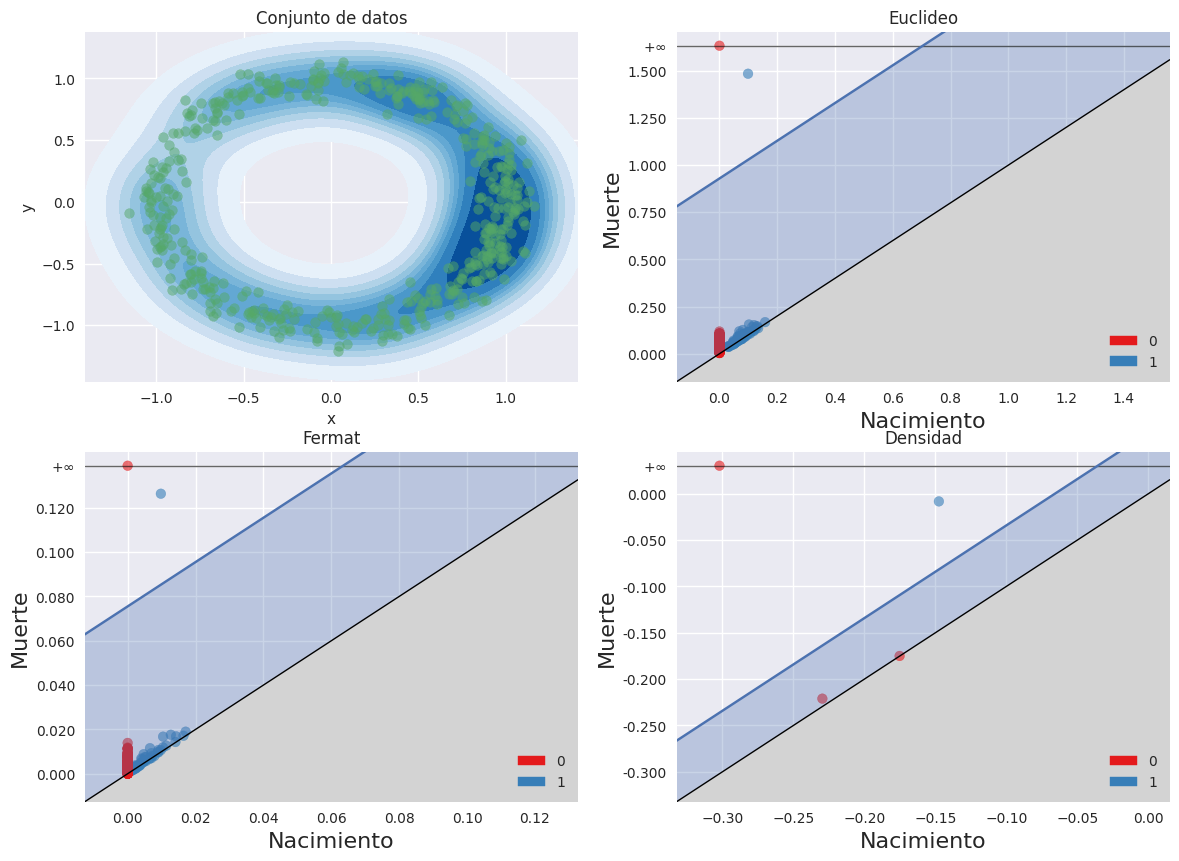

In [29]:
circle_gauss_noise_factory = compose(partial(add_noise, sd=sd), circle_gauss_factory)
circle_gauss_noise_results = run_all(circle_gauss_noise_factory, h=0.3, B_power=B)
circle_gauss_noise_results.powers

## Outliers

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                    18            0.6
         1                    12            0.4
Fermat   0                    30            1.0
         1                     0            0.0
KDE      0                     0            0.0
         1                    30            1.0

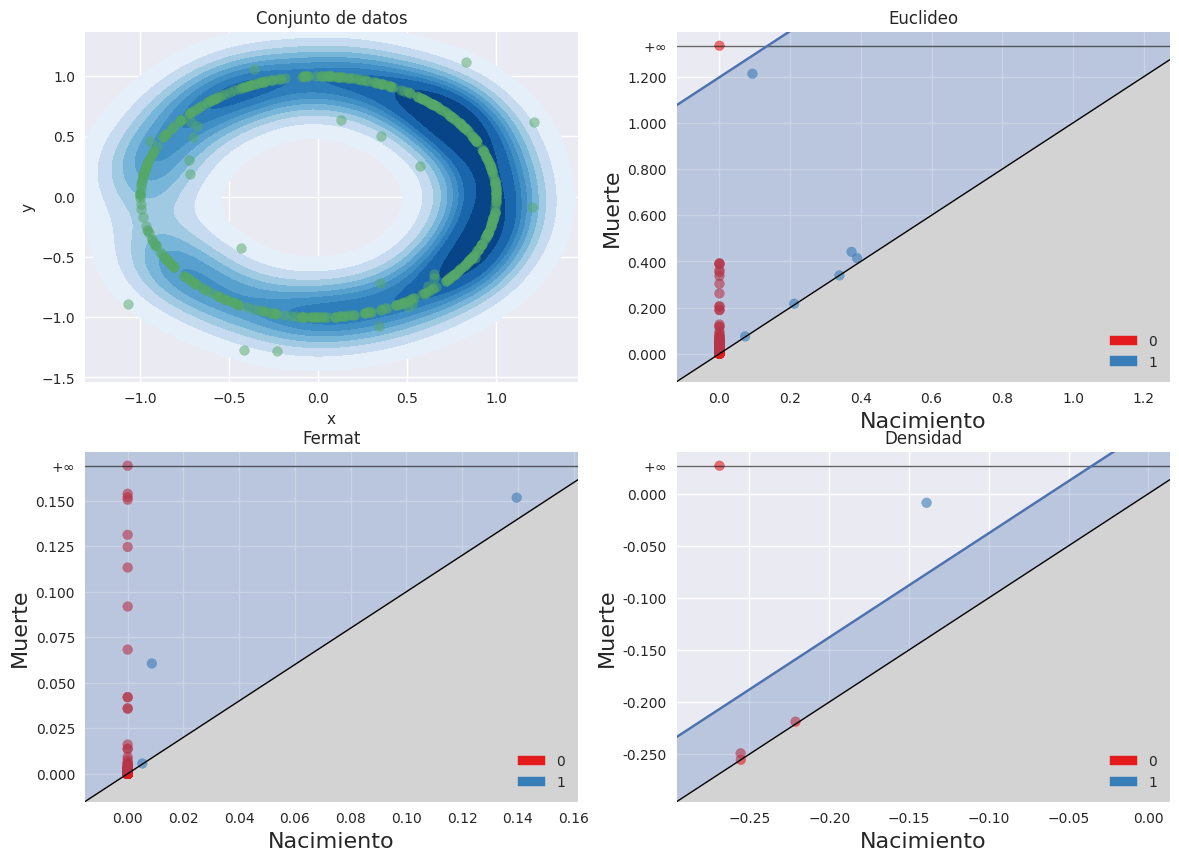

In [11]:
circle_gauss_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    circle_gauss_factory
)
circle_gauss_outliers_results = run_all(circle_gauss_outliers_factory, h=0.3, B_power=B)
circle_gauss_outliers_results.powers

# Eyeglasses

In [29]:
n = 750
bridge_height = 0.4
sd = 0.05
h = 0.20
B = 30

## Base

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 1                     0       0.000000
         2                    30       1.000000
Fermat   1                    30       1.000000
         2                     0       0.000000
KDE      1                     1       0.033333
         2                    29       0.966667

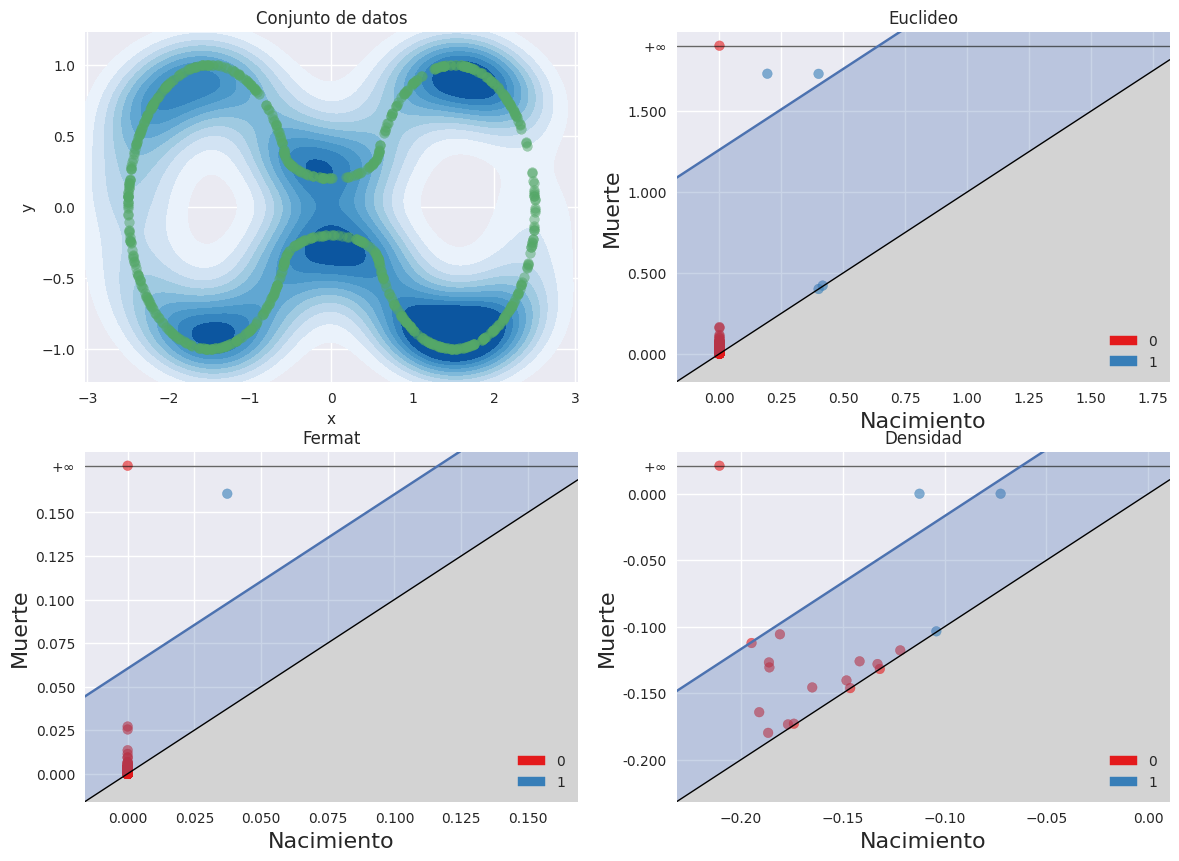

In [30]:
eyeglasses_factory = partial(eyeglasses, n=n, bridge_height=bridge_height)
eyeglasses_results = run_all(eyeglasses_factory, h=h, B_power=B)
eyeglasses_results.powers

## Ruido

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 1                     1       0.033333
         2                    29       0.966667
Fermat   1                    23       0.766667
         2                     7       0.233333
KDE      1                     0       0.000000
         2                    30       1.000000

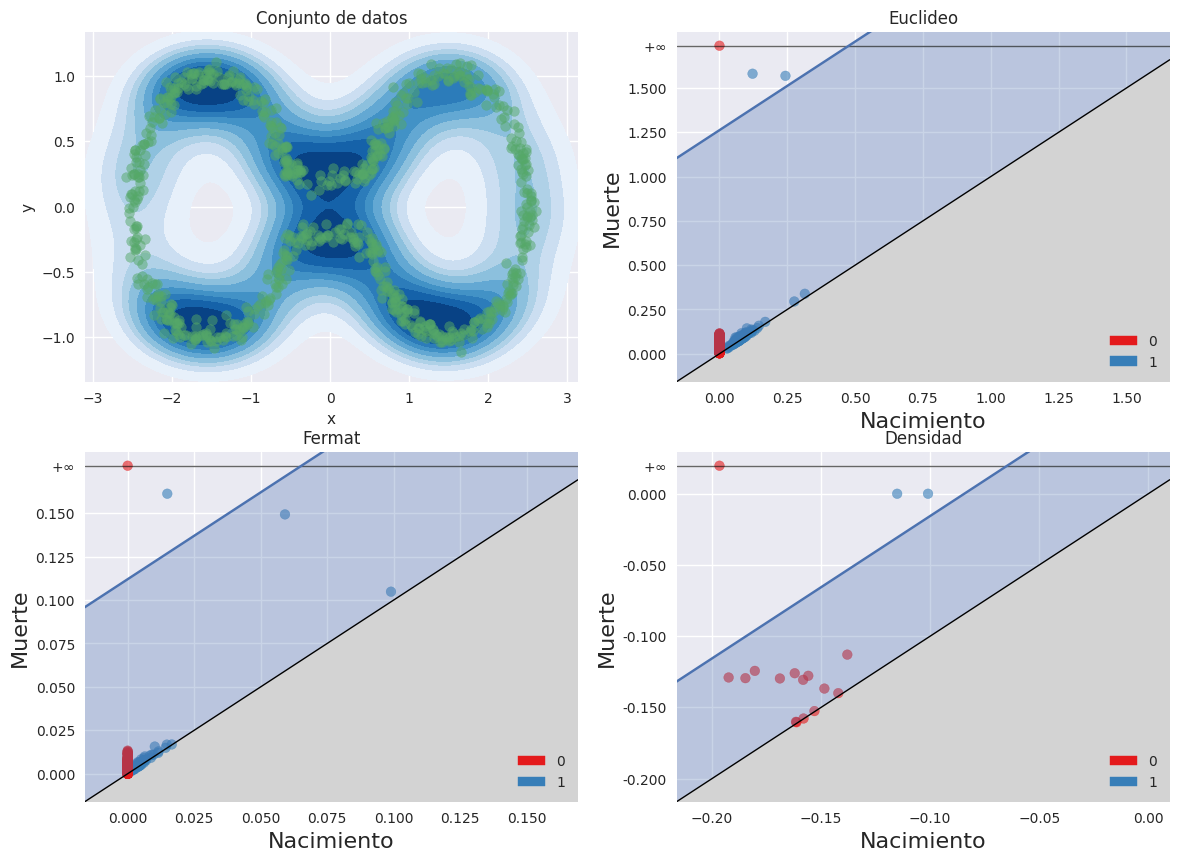

In [31]:
eyeglasses_noise_factory = compose(partial(add_noise, sd=sd), eyeglasses_factory)
eyeglasses_noise_results = run_all(eyeglasses_noise_factory, h=h, B_power=B)
eyeglasses_noise_results.powers

## Outliers

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                    30       1.000000
         1                     0       0.000000
         2                     0       0.000000
Fermat   0                    30       1.000000
         1                     0       0.000000
         2                     0       0.000000
KDE      0                     0       0.000000
         1                     1       0.033333
         2                    29       0.966667

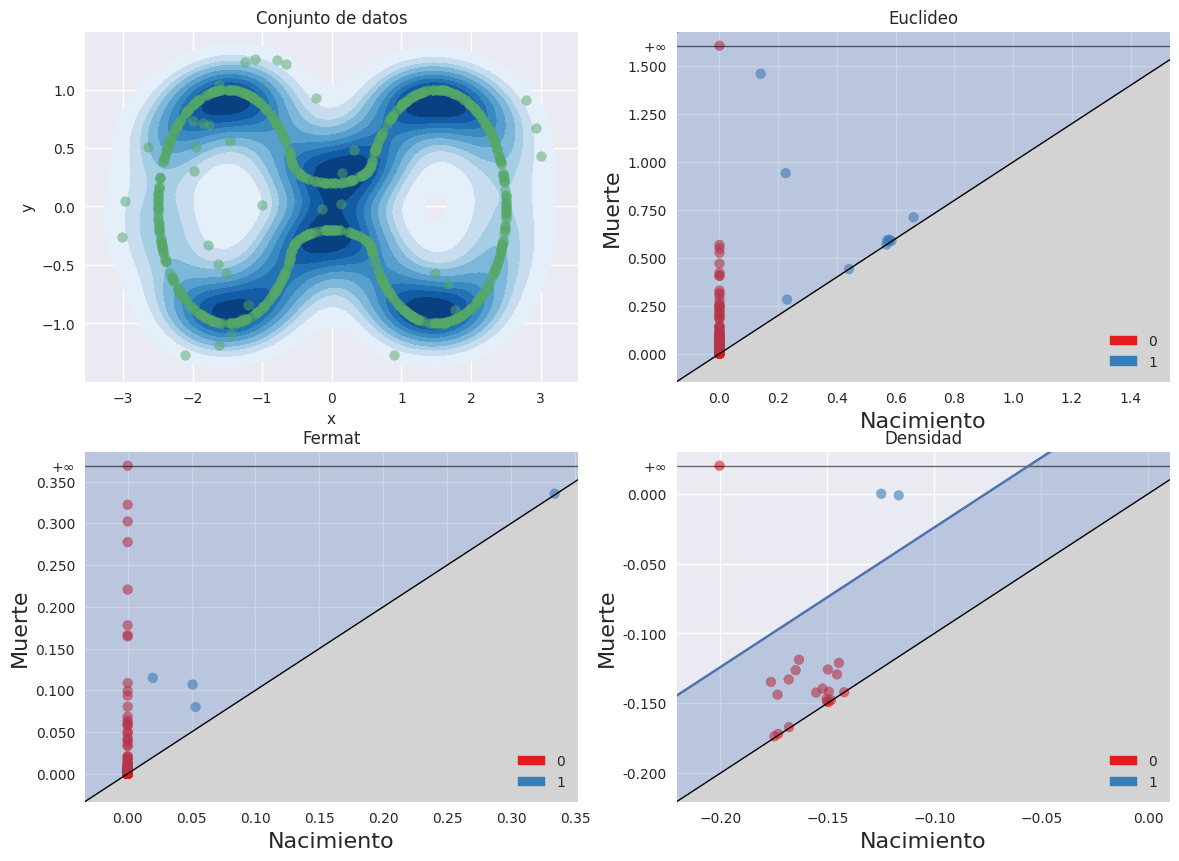

In [32]:
eyeglasses_outliers_factory = compose(
    partial(add_outliers, frac=outliers_frac, iqr_factor=iqr_factor),
    eyeglasses_factory
)
eyeglasses_outliers_results = run_all(eyeglasses_outliers_factory, h=h, B_power=B)
eyeglasses_outliers_results.powers

# Filled circle

In [33]:
n = 750
r_power = 3
max_r = 1
h = 0.15
B = 30

Starting computing intervals
Intervals found in cache:  False
Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat
Starting power analysis
Euclid in cache:  False
Fermat in cache:  False
KDE in cache:  False
Finished euclid power analysis
Finished fermat power analysis
Finished kde power analysis


# Detecciones  % Detecciones
         Agujeros                              
Euclídeo 0                    30       1.000000
         1                     0       0.000000
Fermat   0                    30       1.000000
         1                     0       0.000000
KDE      0                     2       0.066667
         1                    28       0.933333

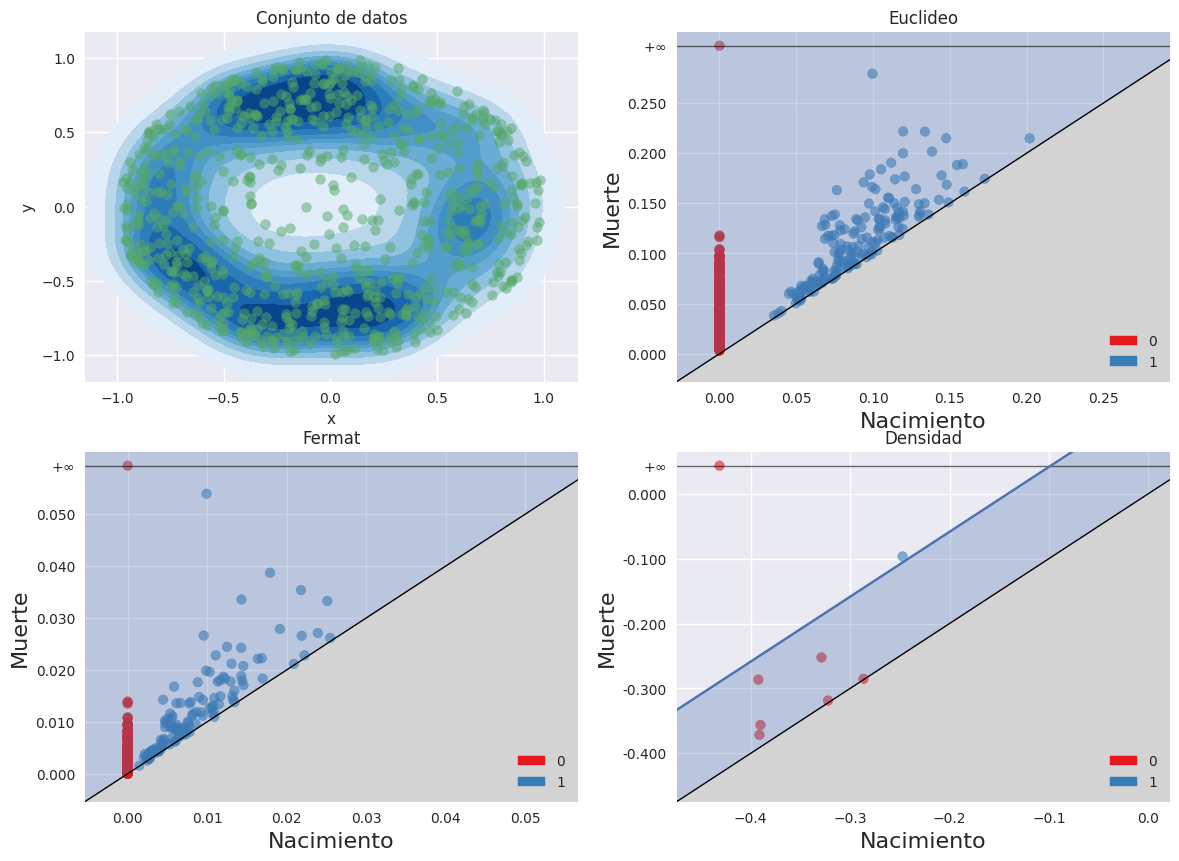

In [34]:
filled_circle_factory = partial(filled_circle, n=n, r_power=r_power, max_r=max_r)
filled_circle_results = run_all(filled_circle_factory, h=h, B_power=B)
filled_circle_results.powers